# Basic MLMC runs and plots

In [1]:
import numpy as np 


def non_hom_test(x, y):
    return np.sin(x)*np.sin(y)


def test_phi(x, y):
    return np.sin(np.pi*x)*np.sin(np.pi*y)


def test_bound(x, y):
    return 0


def test_rhs(x, y):
    return np.pi**2 * (np.sin(np.pi * x)*np.sin(np.pi * y))


In [2]:
from mlmc import mlmc
from tqdm.notebook import tqdm


def check_mlmc(N, epsilon, dt0, x=.5, y=.5):
    errs = np.zeros(N)
    expectation = np.zeros(N)
    cost = np.zeros(N)
    max_level = np.zeros(N)
    for i in tqdm(range(N)):
        expectation[i], cost[i], max_level[i]= mlmc(x, y, 
                                                     test_bound, test_rhs, 
                                                     dt0, epsilon)
        errs[i] =  abs(test_phi(x, y) - expectation[i])
        
    return errs, cost, max_level

In [3]:
import matplotlib.pyplot as plt
N = 50
x = y = .5
dt0s = [.1/(2**i) for i in range(1, 6)]
epsilon = .05
mean_errs = []
mean_levels = []
mean_costs = []

for dt0 in dt0s:
    errs, costs, levels = check_mlmc(N, epsilon, dt0)
    print("average error: ", errs.mean())
    print("maximal error: ", errs.max())
    print("minimal error: ", errs.min())    
    print("std of error: ", errs.std())
    print("average level: ", levels.mean())
    mean_errs.append(errs.mean())
    mean_levels.append(levels.mean())

# Create subplots with 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Log-Log plot
axes[0].loglog(dt0s, mean_errs, label="average error", base=2)
axes[0].set_title("average error")
axes[0].set_xlabel("dt at 0th level")
axes[0].set_ylabel("measured error")
axes[0].legend()

# Linear plot
axes[1].plot(dt0s, mean_levels, label="average max_level", color="r")
axes[1].set_title("max level vs epsilon")
axes[1].set_xlabel("dt at 0th level")
axes[1].set_ylabel("average max_level")
axes[1].set_xscale("log", base=2)
axes[1].legend()

# Show plots
plt.tight_layout()  # Adjust spacing
plt.show()

  0%|          | 0/50 [00:00<?, ?it/s]

average error:  0.036796559064448876
maximal error:  0.12648741965855215
minimal error:  0.001638056115351505
std of error:  0.0282011544292442
average level:  8.08


  0%|          | 0/50 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [4]:
import matplotlib.pyplot as plt
N = 50
x = y = .5
dt0 = .025
epsilons = [.1, .05, .025, .0125]
mean_errs = []
mean_levels = []
mean_costs = []

for eps in epsilons:
    errs, costs, levels = check_mlmc(N, eps, dt0)
    print("average error: ", errs.mean())
    print("maximal error: ", errs.max())
    print("minimal error: ", errs.min())    
    print("std of error: ", errs.std())
    mean_errs.append(errs.mean())
    mean_levels.append(levels.mean())

# Create subplots with 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Log-Log plot
axes[0].loglog(epsilons, mean_errs, label="average error")
axes[0].set_title("average error")
axes[0].set_xlabel("target epsilon")
axes[0].set_ylabel("measured error")
axes[0].legend()

# Linear plot
axes[1].plot(epsilons, mean_levels, label="max_level", color="r")
axes[1].set_title("max level vs epsilon")
axes[1].set_xlabel("target epsilon")
axes[1].set_ylabel("average max_level")
axes[1].set_xscale("log")
axes[1].legend()

# Show plots
plt.tight_layout()  # Adjust spacing
plt.show()

  0%|          | 0/50 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [6]:
# benchmark how long it takes to generate a single sample
from random_walk import feynman_kac_correlated, feynman_kac_sample
x = .5
y = .5
dt_fine = .00001
level = 1

%timeit feynman_kac_sample(x, y, test_bound, test_rhs, dt_fine)

54 ms ± 8.36 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [6]:
y = np.log2(np.abs(np.array([-6.05463385e-02, -3.70904309e-02, -2.06358718e-02, 
                    -2.25945456e-02, -1.50705625e-02, -9.64745850e-04])))
x = np.linspace(1, 6, 6)

a, b = np.polyfit(x, y, 1)
a2, b2, = np.polyfit(x[:-1], y[:-1], 1)

<function matplotlib.pyplot.show(close=None, block=None)>

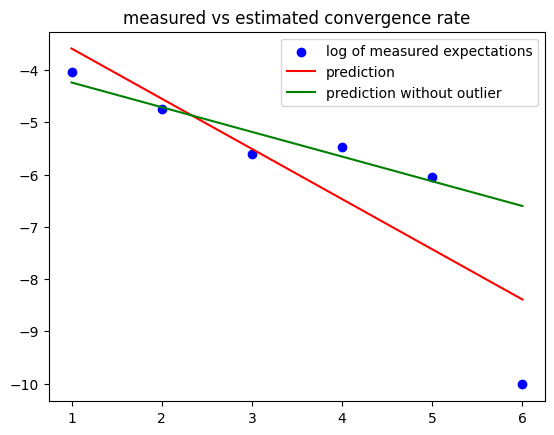

In [7]:
plt.scatter(x, y, label="log of measured expectations", color="b")
plt.plot(x, a*x + b, label="prediction", color="r")
plt.plot(x, a2*x + b2, label="prediction without outlier", color="g")
plt.title("measured vs estimated convergence rate")
plt.legend()
plt.show

In [2]:
from mlmc import mlmc
from tqdm.notebook import tqdm


def check_mlmc_non_hom(N, epsilon, dt0, x=.5, y=.5):
    errs = np.zeros(N)
    expectation = np.zeros(N)
    cost = np.zeros(N)
    max_level = np.zeros(N)
    for i in tqdm(range(N)):
        expectation[i], cost[i], max_level[i], _ = mlmc(x, y, 
                                                    non_hom_test, non_hom_test, 
                                                     dt0, epsilon)
        errs[i] =  abs(non_hom_test(x, y) - expectation[i])
        
    return errs, cost, max_level

  0%|          | 0/50 [00:00<?, ?it/s]

average error:  0.0056499482864913195
maximal error:  0.022195797535334988
minimal error:  0.00010005800404216947
std of error:  0.00452777994656258


  0%|          | 0/50 [00:00<?, ?it/s]

average error:  0.006380301233744884
maximal error:  0.02384457833374823
minimal error:  0.00018573878162506108
std of error:  0.005554652561827532


  0%|          | 0/50 [00:00<?, ?it/s]

average error:  0.006424093702260508
maximal error:  0.018979132476077742
minimal error:  0.00040927128753237563
std of error:  0.00497904604662376


  0%|          | 0/50 [00:00<?, ?it/s]

average error:  0.007156710113516044
maximal error:  0.02277666492239197
minimal error:  0.0002842572456129844
std of error:  0.005424825213377333


  0%|          | 0/50 [00:00<?, ?it/s]

average error:  0.0060750891402335935
maximal error:  0.015644618065294574
minimal error:  0.0006556772360453156
std of error:  0.004429052788620432


  0%|          | 0/50 [00:00<?, ?it/s]

average error:  0.006032478108010637
maximal error:  0.02047396694257589
minimal error:  2.3898518316051165e-05
std of error:  0.005039429338729811


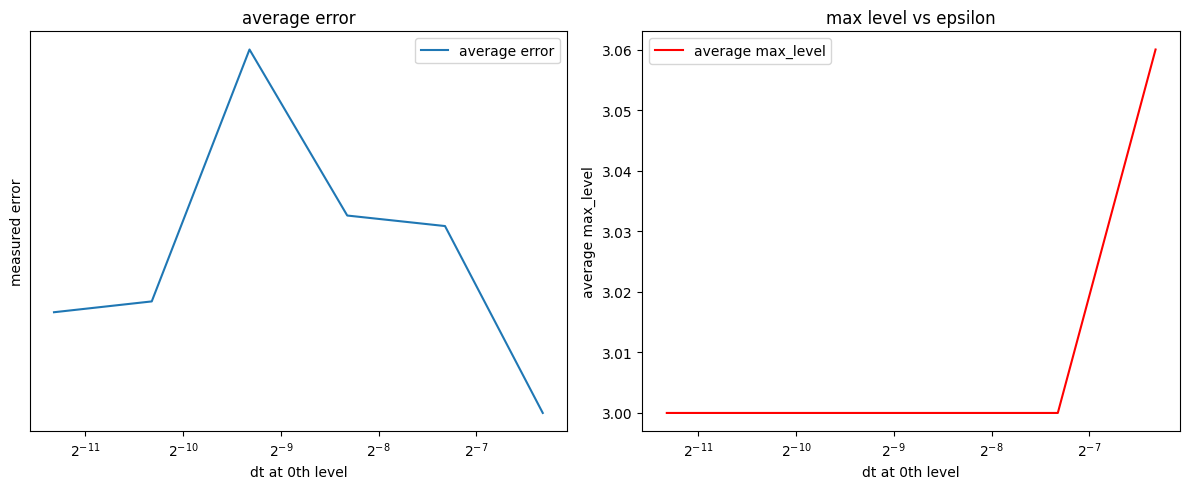

In [3]:
import matplotlib.pyplot as plt
N = 50
x = y = .5
dt0s = [.1/(2**i) for i in range(3, 9)]
epsilon = .025
mean_errs = []
mean_levels = []
mean_costs = []

for dt0 in dt0s:
    errs, costs, levels = check_mlmc_non_hom(N, epsilon, dt0)
    print("average error: ", errs.mean())
    print("maximal error: ", errs.max())
    print("minimal error: ", errs.min())    
    print("std of error: ", errs.std())
    mean_errs.append(errs.mean())
    mean_levels.append(levels.mean())

# Create subplots with 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Log-Log plot
axes[0].loglog(dt0s, mean_errs, label="average error", base=2)
axes[0].set_title("average error")
axes[0].set_xlabel("dt at 0th level")
axes[0].set_ylabel("measured error")
axes[0].legend()

# Linear plot
axes[1].plot(dt0s, mean_levels, label="average max_level", color="r")
axes[1].set_title("max level vs epsilon")
axes[1].set_xlabel("dt at 0th level")
axes[1].set_ylabel("average max_level")
axes[1].set_xscale("log", base=2)

axes[1].legend()

# Show plots
plt.tight_layout()  # Adjust spacing
plt.show()

In [6]:
from main import generate_samples
import matplotlib.pyplot as plt

def check_dt_conv(N, dt0, levels, N_it=10):
    dts = dt0 * np.logspace(0, levels-1, levels, base=2)
    errs = np.zeros((levels, N_it))
    for i in range(levels):
        for i in range(N_it):
            samps = generate_samples(.5, .5, N, dts[i])
            errs[i,j] = abs(samps.mean - test_phi(.5, .5))

    mean_errs = np.array([errs[i,:].mean() for i in range(levels)])
    plt.plot(dts, mean_errs, label="average error")

In [5]:
.01/2**15

3.0517578125e-07